Este é o Notebook oficial do grupo 4, aqui teremos:
- um resumo da análise de dados;
- os códigos responsáveis pelo processamento (tratamento) dos dados da tabela;
- o modelo preditivo;

Em todos os códigos, há comentários suficientes para explicar o objetivo e funcionamento da função.

# 1.0 - Importações e instalações

In [ ]:
# !pip install dataprep
!pip install moment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

# Bibliotecas 
import pandas as pd
import datetime as dt
from datetime import date
import numpy as np
from sklearn import preprocessing
import moment

## Bibliotecas para os gráficos
import matplotlib.pyplot as plt #geração de gráficos
import seaborn as sns #template de gráficos
import plotly.express as px #geração de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

### Modelos preditivos:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn import svm # SVM model
from sklearn.naive_bayes import GaussianNB # naive bayes model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler, SMOTE


#### Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve

py.init_notebook_mode(connected=True) 

In [ ]:
# Conectando ao google drive
from google.colab import drive
drive.mount('/content/drive')
content_link = '/content/drive/Shareddrives/G444 Drive/docs everymind/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx'

Mounted at /content/drive


In [ ]:
# Importando as planilhas
df1 = pd.read_excel(content_link)
df2 = pd.read_excel(content_link, sheet_name = 'Reconhecimento')
df3 = pd.read_excel(content_link, sheet_name = 'Ambiente de Trabalho 27.07')

# 2.0 - Análise de Dados - Resumo

## 2.1 - Tipo dos dados

A partir do código abaixo, podemos notar que algumas colunas não estão com a tipagem certa, como a Dt Admissao, que deveria ser dateime64[ns] (tipo data) e está como object (tipo texto). Precisamos tratar esses dados e passar um Label Encoder para categorizar outros dados do tipo object, como Estado.

In [ ]:
print('Dataframe 1', df1.dtypes, 'Dataframe 2', df2.dtypes, 'Dataframe 3', df3.dtypes)

Dataframe 1 Matrícula               float64
Nome Completo            object
Dt Admissao              object
Dt Saida         datetime64[ns]
Tipo Saida               object
Cargo                    object
Salario Mês             float64
Dt Nascimento    datetime64[ns]
Genero                   object
Etnia                    object
Estado Civil             object
Escolaridade             object
Estado                   object
Cidade                   object
Area                     object
dtype: object Dataframe 2 Matricula                  float64
Codinome                    object
Situação                    object
Data de Admissão    datetime64[ns]
Data Vigência       datetime64[ns]
Novo Cargo                  object
Novo Salario               float64
Motivo                      object
Alterou Função              object
dtype: object Dataframe 3 Divisao                   object
Pilar                     object
Pontuação                 object
Fator                     object
Pontuação

# 3.0 - Tratamento de Dados

Resumo da seção:
- Dicionário dos dados
- Modificação
- Categorização
- Derivação
- Seleção

## 3.0.1 - Dicionário de dados
Este é o dicionário dos valores numéricos que serão tratados na seção.

Na categorização de dados, criamos:
- Genero Numérico (df1):
  - 0 é masculino
  - 1 é feminino
- Tipo Saída Numérico (df1):
  - 0 significa ativo
  - 1 significa rescisão de contrato por pedido de demissão
  - 2 significa rescisão de contrato por demissão
  - 3 significa demissão
  - 4 significa pedido de demissão
- Regiões (df1):
  - 1 representa a região Norte
  - 2 representa a região Nordeste
  - 3 representa a região Centro-Oeste
  - 4 representa a região Sudeste
  - 5 representa a região Sul
- Situação (df2):
  - 0 significa desativo
  - 1 significa ativo ou afastado
- Status (df1):
  - 0 significa desativo
  - 1 significa ativo 
- Salário Comparado (df1):
  - 0 significa que o salário do colaborador está igual ou maior à média salarial do cargo
  - 1 é quando o salário da colaborador é menor do que a média salarial do cargo
- Faixa etária (df1):
  - 0 é entre 18 e 21
  - 1 é entre 22 e 25
  - 2 é entre 26 e 29
  - 3 é entre 30 e 33
  - 4 é entre 34 e 37
  - 5 é entre 38 e 41
  - 6 é entre 42 e 45
  - 7 é entre 46 e 49
  - 8 é entre 50 e 65
- Estado SP (df1): 
  - 0 significa morar fora de SP
  - 1 significa morar em SP
- Estado Civil - EC (df1)
  - 0 representa os solteiros (incluindo divorciados e separados)
  - 1 representa casados (incluindo união estável)
- Area - Area_num
  - AMS é 0
  - AgenciaDigital é 1
  - Analytics é 2
  - BAC é 3
  - BPM é 4
  - BestMinds é 5
  - CPG&Retail é 6
  - CPG&RetailI é 7
  - CPG&RetailII é 8
  - Commerce é 9
  - Core&Industrias é 10
  - Core&IndustriasI é 11
  - Core&IndustriasII é 12
  - Diretoria é 13
  - Education é 14
  - Financeiro é 15
  - Infraestrutura é 16
  - Integration é 17
  - MktCloud é 18
  - PS é 19
  - People é 20
  - Produtos é 21
  - Vendas é 22
- Cidades (df1)
  - s

## 3.1 - Modificação de dados

- Eliminiação de espaços
- Tipificação de dados (como datas em string para datetime)

### 3.1.1 - Eliminação de espaços

In [ ]:
# Aqui percorremos todas as linhas das colunas e fazer a alteração de onde possui espaço em branco e substituir para vazio 
# (percorremos apenas linhas em string, por isso o argumento 'object' e o atributo str)
for i in df1.select_dtypes(include = 'object').columns.drop('Dt Admissao'):
  df1[i] = df1[i].str.replace(' ','')

In [ ]:
for i in df2.select_dtypes(include = 'object'):
  df2[i] = df2[i].str.replace(' ','')

### 3.1.2 - Eliminação de Pessoa Colaboradora

In [ ]:
# Aqui substituímos o texto de "PessoaColaboradora" de todas as linhas da coluna 'Nome Completo' por vazio 
# (isso tem como objetivo obter apenas o número do colaborador)
for i in range(0, len(df1['Nome Completo'])):
  df1['Nome Completo'][i] = df1['Nome Completo'][i].replace('PessoaColaboradora', '')
  int(df1['Nome Completo'][i])
  

for i in range(0, len(df2['Codinome'])):
  df2['Codinome'][i] = df2['Codinome'][i].replace('PessoaColaboradora', '')
  int(df2['Codinome'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.1.3 - Renomeação de coluna

In [ ]:
df1 = df1.rename(columns={'Matrícula': 'Matricula'})
df2 = df2.rename(columns={'Novo Salario': 'Novo_Salario', 'Alterou Função': 'Alterou_Função', 'Novo Cargo': 'Novo_Cargo'})

### 3.1.4 - Tratamento de datas

In [ ]:
df1['Dt Saida'] = df1['Dt Saida'].replace(np.NaN, pd.to_datetime('today'))

In [ ]:
# O for percorre as linhas de 0 até a quantidade de linhas presente na coluna "Dt Admissao"
for i in range(0, len(df1['Dt Admissao'])):
  #Passa por cada linha das colunas selecionadas e troca a formatação do conteúdo que está lá pelo formato indicado
  #remoção das horas das datas e troca as / por -
  df1['Dt Admissao'][i] = str(df1['Dt Admissao'][i]).replace('00:00:00', '').replace('/', '-')
  df1['Dt Saida'][i] = str(df1['Dt Saida'][i]).replace('00:00:00', '').replace('/', '-')
  #Padronização de todos os dados para o formato (ano, mês, dia)
  df1['Dt Admissao'][i] = moment.date(df1['Dt Admissao'][i]).format("YYYY-MM-DD")
  df1['Dt Saida'][i] = moment.date(df1['Dt Saida'][i]).format("YYYY-MM-DD")
# No fim, mudamos a tipagem das duas variáveis para datetime com formato apenas de data
df1['Dt Admissao'] = pd.to_datetime(df1['Dt Admissao'], format="%Y/%m/%d")
df1['Dt Saida'] = pd.to_datetime(df1['Dt Saida'], format="%Y/%m/%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying t

## 3.2 - Categorização
Aqui categorizamos os dados para numérico para tratar melhor com o modelo preditivo (como categorizar Tipo de Saída dos funcionários)

### 3.2.1 - Gênero
Categorização em gênero

In [ ]:
# Categorização do gênero dos funcionários
# 0 significa Masculino
# 1 significa Feminino
df1['Genero_Numerico'] = (df1['Genero']
                          .replace('Masculino', 0)
                          .replace('Feminino', 1))

### 3.2.2 - Tipo Saida
Tipo de saída da empresa por ordem de relevância (em que o pedido de demissão é mais importante).

In [ ]:
# Categorização do tipo de saída dos funcionários
# 0 significa ativo
# 1 significa rescizão de contrato por pedido de demissão
# 2 significa rescisão de contrato por demissão
# 3 significa demissão
# 4 significa pedido de demissão
df1['Tipo_Saida_Numerico'] = (df1['Tipo Saida']
                              .fillna(0)
                              .replace('RescisaoContratoExp-Dispensa', 1)
                              .replace('RescisaoContratoExp-Pedido', 2)
                              .replace('DispensasemJustaCausa', 3)
                              .replace('PedidodeDemissão', 4))

### 3.2.3 - Estado e Região
LabelEncoder nas variáveis Estado e Região

In [ ]:
# Categorização dos Estados para futuros cruzamentos de dados
df1['Estado_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Estado'])

In [ ]:
# Categorização das Regiões (agrupando os Estados)
# '1' para Norte
# '2' para Nordeste
# '3' para Centro-Oeste
# '4' para Sudeste
# '5' para Sul
df1['Regiao_Numerico'] = (df1['Estado']
                       # Norte
                       .replace('AM', 1)
                       .replace('RR', 1)
                       .replace('AC', 1)
                       .replace('RO', 1)
                       .replace('AP', 1)
                       .replace('PA', 1)
                       .replace('TO', 1)
                       # Nordeste
                       .replace('MA', 2)
                       .replace('CE', 2)
                       .replace('PI', 2)
                       .replace('RN', 2)
                       .replace('PB', 2)
                       .replace('PE', 2)
                       .replace('AL', 2)
                       .replace('SE', 2)
                       .replace('BA', 2)
                       # Centro
                       .replace('MS', 3)
                       .replace('GO', 3)
                       .replace('DF', 3)
                       .replace('MT', 3)
                       # Sudeste
                       .replace('MG', 4)
                       .replace('ES', 4)
                       .replace('RJ', 4)
                       .replace('SP', 4)
                       # Sul
                       .replace('PR', 5)
                       .replace('SC', 5)
                       .replace('RS', 5)
                       )

### 3.2.4 - Cargo
Cargo dos colaboradores no df1

In [ ]:
# Categorização dos Cargos para futuros cruzamentos de dados
df1['Cargo_Numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cargo'])

### 3.2.5 - Situação
Situação dos colaboradores no df2

In [ ]:
# Categorização da situação dos funcionários
# 0 significa que o funcionário foi desligado
# 1 significa que o funcionário está ativo
df2['Situação_Numerico'] = (df2['Situação']
                          .replace('Desligado', 0)
                          .replace('Ativo', 1)
                          .replace('Afastado',1))

###3.2.6 - Área
Área de atuação dos colaboradores

In [ ]:
df1['Area_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Area'])

In [ ]:
df1[['Area', 'Area_numerico']].value_counts()

Area               Area_numerico
Core&IndustriasI   11               101
Core&IndustriasII  12               100
CPG&RetailII       8                 38
AMS                0                 36
CPG&RetailI        7                 35
Commerce           9                 30
Analytics          2                 22
PS                 19                19
Vendas             22                18
MktCloud           18                14
Produtos           21                13
Integration        17                11
People             20                 9
CPG&Retail         6                  8
AgenciaDigital     1                  8
Education          14                 3
Financeiro         15                 3
BestMinds          5                  2
BPM                4                  1
Infraestrutura     16                 1
Core&Industrias    10                 1
BAC                3                  1
Diretoria          13                 1
dtype: int64

### 3.2.7 - LabelEncoder no df2

In [ ]:
#Substituindo os valores das colunas da tabela 2 por valores numéricos
for column in df2.drop(['Data de Admissão',	'Data Vigência', 'Novo_Salario', 'Codinome', 'Matricula'], axis=1):
  df2[f'{column}_Numerico'] = preprocessing.LabelEncoder().fit_transform(df2[column])

###3.2.8 Cidade

In [ ]:
df1['Cidade_numerico'] = preprocessing.LabelEncoder().fit_transform(df1['Cidade'])

In [ ]:
df1[['Cidade', 'Cidade_numerico']].sort_values

<bound method DataFrame.sort_values of               Cidade  Cidade_numerico
0           SãoPaulo              112
1           SãoPaulo              112
2    FranciscoMorato               41
3             Osasco               74
4          Guarulhos               45
..               ...              ...
470          Pelotas               80
471          SãoJosé              110
472          Pelotas               80
473           Osasco               74
474         SãoPaulo              112

[475 rows x 2 columns]>

## 3.3 - Derivação
Aqui criamos algumas variáveis a mais a partir dos dados que temos para melhorar o modelo preditivo (como criar a idade a partir da data de nascimento)

### 3.3.1 - Status

In [ ]:
# Criação da coluna status, onde 
# "0" é "desativo" 
# "1" é "ativo"
df1['Status'] = (df1['Tipo Saida']
                              .fillna(1)
                              .replace('RescisaoContratoExp-Dispensa', 0)
                              .replace('RescisaoContratoExp-Pedido', 0)
                              .replace('DispensasemJustaCausa', 0)
                              .replace('PedidodeDemissão', 0))

### 3.3.2 - Média Salarial 

In [ ]:
df1['Media_Salarial'] = -1

for i in range(0, len(df1)):
  Cargo_da_pessoa = df1['Cargo_Numerico'][i]
  df1['Media_Salarial'][i] = df1.query(f'`Cargo_Numerico` == {Cargo_da_pessoa}').mean()['Salario Mês']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['Salario_Comparado'] = 0

for item in range(0,len(df1)):
    if df1['Media_Salarial'][item] > df1['Salario Mês'][item]:
        df1['Salario_Comparado'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3.3.3 - Tempo de trabalho

In [ ]:
#Função pega a data de admissão do colaborador e a data do seu desligamento, e encontra o perído entre elas.


In [ ]:
df1['Tempo_de_Trabalho'] = ((df1['Dt Saida'] - df1['Dt Admissao'])/ np.timedelta64(1, 'D')).astype(int)

### 3.3.4 - Idade

In [ ]:
#Ele pega a data de hoje e subtrai da data de nascimento, retornando a idade, np.timedelta64, transforma o retorno da data de dias para ano.
df1['Idade'] = ((pd.to_datetime('today')-pd.to_datetime(df1['Dt Nascimento']))/ np.timedelta64(1, 'Y')).astype(int)

### 3.3.5 - Faixa Etária

In [ ]:
df1['Faixa_Etaria'] = 0
for i in range(0, len(df1)):
    if df1['Idade'][i] >= 18 and  df1['Idade'][i] <= 21:
        df1['Faixa_Etaria'][i] = 0
    elif df1['Idade'][i] >= 22 and  df1['Idade'][i] <= 25:
        df1['Faixa_Etaria'][i] = 1
    elif df1['Idade'][i] >= 26 and  df1['Idade'][i] <= 29:
        df1['Faixa_Etaria'][i] = 2
    elif df1['Idade'][i] >= 30 and  df1['Idade'][i] <= 33:
        df1['Faixa_Etaria'][i] = 3
    elif df1['Idade'][i] >= 34 and  df1['Idade'][i] <= 37:
        df1['Faixa_Etaria'][i] = 4
    elif df1['Idade'][i] >= 38 and  df1['Idade'][i] <= 41:
        df1['Faixa_Etaria'][i] = 5
    elif df1['Idade'][i] >= 42 and  df1['Idade'][i] <= 45:
        df1['Faixa_Etaria'][i] = 6
    elif df1['Idade'][i] >= 46 and  df1['Idade'][i] <= 49:
        df1['Faixa_Etaria'][i] = 7
    elif df1['Idade'][i] >= 50 and  df1['Idade'][i] <= 65:
        df1['Faixa_Etaria'][i] = 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is tryin

### 3.3.6 - Período de estagnação de reconhecimento

O período de estagnação está em dias, e é o período de tempo entre o reconhecimento e o dia de hoje.

In [ ]:
df2['Estagnação'] = ((pd.to_datetime('today')-pd.to_datetime(df2['Data Vigência']))/ np.timedelta64(1, 'D')).astype(int)

### 3.3.7 - Estagnação na df1

In [ ]:
# def get_estagnacao(x): #define a funcao
#   df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que estão nas duas tabelas ao mesmo tempo
#   return df_funcionario['Estagnação'].min() #devolve, desse dataframe, apenas o menor valor de estagnação
# df1['Estagnação'] = df1.apply(get_estagnacao, axis=1)

In [ ]:
df1['Estagnação'] = 0

contador = 0
for matricula in df1['Matricula']:
  if matricula in df2['Matricula'].values:
    query = df2.query(f'Matricula == {matricula}')
    if query['Matricula'].count() > 1:
      df1['Estagnação'][contador] = np.array(query['Estagnação']).min()
    else:
      df1['Estagnação'][contador] = query['Estagnação']
  else:
    if df1.query(f'Matricula == {matricula}')['Status'][contador] == 0:
      df1['Estagnação'][contador] = round(((pd.to_datetime(df1['Dt Saida'][contador])-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))
    else:
      df1['Estagnação'][contador] = round(((pd.to_datetime('today')-pd.to_datetime(df1['Dt Admissao'][contador]))/np.timedelta64(1, 'D')))

  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is tryin

### 3.3.8 - Reconhecimento por colaborador


In [ ]:
num_prom = df2['Codinome'].value_counts()

In [ ]:
df2['Reconhecimento_Numerico'] = df2['Codinome'].replace(num_prom)

### 3.3.9 - Quantidade de Reconhecimento

In [ ]:
def get_reconhecimento(x): #define a funcao
  df_funcionario = df2[df2['Matricula']==x['Matricula']] #cria um dataframe com apenas os dados que estão nas duas tabelas ao mesmo tempo
  return df_funcionario['Reconhecimento_Numerico'].min() #devolve, desse dataframe, um dos valores
df1['Reconhecimento_Numerico'] = df1.apply(get_reconhecimento, axis=1).fillna(0)

### 3.3.10 - Média de Reconhecimento por Tempo

In [ ]:
df1['Reconhecimento_Medio'] = 0
contador = 0
for pessoa in df1['Reconhecimento_Medio']:
  if df1['Reconhecimento_Numerico'][contador] != 0:
    df1['Reconhecimento_Medio'][contador] = (df1['Tempo_de_Trabalho'][contador])/(df1['Reconhecimento_Numerico'][contador])
  contador += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###3.3.11 - Estado Civil

In [ ]:
# Categorização do estado civil (EC)
# '0' para Solteiros (incluindo divorciados e separados)
# '1' para Casados (incluindo União Estável)

In [ ]:
df1['Estado Civil'].value_counts()

Solteiro        342
Casado          114
Divorciado       14
UniãoEstável      3
Separado          2
Name: Estado Civil, dtype: int64

In [ ]:
df1['ECivil_Numerico'] = (df1['Estado Civil']
                      .replace('Casado', 1)
                      .replace('UniãoEstável', 1)
                      .replace('Divorciado', 1)
                      .replace('Separado', 1)
                      .replace('Solteiro', 0))

## 3.4 - Seleção de dados

### 3.4.1 - Relações de reconhecimento

Em ordem: 
- Pessoas que saíram
- Pessoas que não saíram
- Pessoas que foram reconhecidas de alguma forma
- Pessoas que não foram reconhecidas
- Pessoas que saíram e foram reconhecidas
- Pessoas que saíram e não foram reconhecidas 

In [ ]:
# Pessoas que saíram: ✔
pessoas_desativadas = df1.dropna(subset=['Dt Saida'])['Nome Completo'].unique()
qtd_desativados = len(pessoas_desativadas)
qtd_desativados

470

In [ ]:
# Pessoas que não saíram: ✔
pessoas_ativas = df1.query('`Dt Saida` == ""')['Nome Completo'].unique()
len(pessoas_ativas)

0

In [ ]:
# Pessoas que foram reconhecidas de alguma forma: ✔
pessoas_reconhecidas = df2['Codinome'].unique()
len(pessoas_reconhecidas)

173

In [ ]:
# Pessoas que não foram reconhecidas: ✔
lista_pessoas = df1['Nome Completo'].unique()
pessoas_sem_reconhecimento = []
for i in range(0, len(lista_pessoas)):
  if lista_pessoas[i] in pessoas_reconhecidas:
    continue
  else:
    pessoas_sem_reconhecimento.append(lista_pessoas[i])
len(pessoas_sem_reconhecimento)

298

In [ ]:
# Pessoas que não foram reconhecidas e saíram:
pessoas_desativadas_sem_reconhecimento = []
for pessoa in pessoas_desativadas:
  if pessoa in pessoas_reconhecidas:
    continue
  else:
    pessoas_desativadas_sem_reconhecimento.append(pessoa)
print(len(pessoas_desativadas_sem_reconhecimento))

298


In [ ]:
  # Pessoas que foram reconhecidas e saíram ✔
pessoas_desativadas_reconhecidas = df2.query('`Situação` == "Desligado"')['Codinome'].unique()
len(pessoas_desativadas_reconhecidas)

62

### 3.4.2 - Gênero

In [ ]:
gen_total = df1.groupby(['Genero_Numerico']).count()
gen_total

,Matricula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,...,Status,Media_Salarial,Salario_Comparado,Tempo_de_Trabalho,Idade,Faixa_Etaria,Estagnação,Reconhecimento_Numerico,Reconhecimento_Medio,ECivil_Numerico
Genero_Numerico,,,,,,,,,,,,,,,,,,,,,
0,363,363,363,363,156,363,363,363,363,363,...,363,363,363,363,363,363,363,363,363,363
1,112,112,112,112,35,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112


In [ ]:
gen_total_masc = gen_total.iloc[0, 1]
gen_total_masc

363

In [ ]:
gen_total_fem = gen_total.iloc[1, 1]
gen_total_fem

112

In [ ]:
gen_masc_left = gen_total.iloc[0, 3]
gen_masc_left

363

In [ ]:
gen_fem_left = gen_total.iloc[1, 3]
gen_fem_left

112

In [ ]:
gen_fem_prop = (gen_fem_left/gen_total_fem)*100
gen_fem_prop

100.0

In [ ]:
gen_masc_prop = (gen_masc_left/gen_total_masc)*100
gen_masc_prop

100.0

### 3.4.3 - Saída por estado 

In [ ]:
df1['estadoSP'] = 0

for item in range(0,len(df1)):
    if df1['Estado_Numerico'][item] == 16:
        df1['estadoSP'][item] = 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Estado_total = df1.groupby(['estadoSP']).count()

In [ ]:
total_foraSP = Estado_total.iloc[0, 1]
total_foraSP

118

In [ ]:
total_emSP = Estado_total.iloc[1, 1]
total_emSP

357

In [ ]:
total_foraSP_off = Estado_total.iloc[0, 3]
total_foraSP_off

118

In [ ]:
total_emSP_off = Estado_total.iloc[1, 3]
total_emSP_off

357

In [ ]:
emSP_prop = (total_emSP_off/total_emSP)*100
emSP_prop

100.0

In [ ]:
foraSP_prop = (total_foraSP_off/total_foraSP)*100
foraSP_prop

100.0

# 4.0 - Gráficos

### 4.1 - Porcentagem de saídas em gênero 

Text(0.5, 1.0, 'Desligamentos x Gênero (proporcionalmente)')

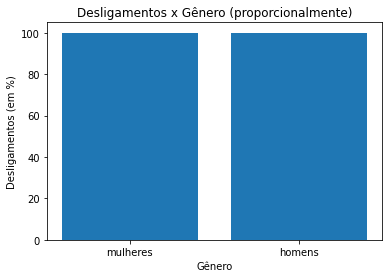

In [ ]:
gen_x = ['mulheres', 'homens']
gen_y = [gen_fem_prop, gen_masc_prop]

plt.bar(gen_x, gen_y)

plt.xlabel('Gênero')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x Gênero (proporcionalmente)')

## 4.2 - Porcentagem de saída por estado

Text(0.5, 1.0, 'Desligamentos x cidade (proporcionalmente)')

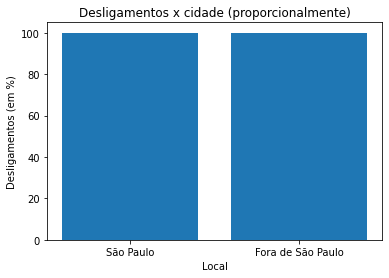

In [ ]:
est_x = ['São Paulo', 'Fora de São Paulo']
est_y = [emSP_prop,foraSP_prop]

plt.bar(est_x, est_y)

plt.xlabel('Local')
plt.ylabel('Desligamentos (em %)')
plt.title('Desligamentos x cidade (proporcionalmente)')

# 5.0 - Modelagem

## 5.0.1 - Seleção de dados para a modelagem:

In [ ]:
testes = [
    ['Faixa_Etaria', 'Cargo_Numerico', 'Regiao_Numerico', 'Estado_Numerico', 'Salario Mês', 'Salario_Comparado'],
    ['Faixa_Etaria', 'Salario_Comparado', 'estadoSP'],
    ['Faixa_Etaria', 'Salario_Comparado', 'estadoSP', 'Reconhecimento_Medio', 'Estagnação'],
    ['Faixa_Etaria', 'Salario_Comparado', 'estadoSP', 'Reconhecimento_Medio', 'Estagnação',  'Cargo_Numerico'],
    ['Idade', 'Cargo_Numerico', 'Regiao_Numerico', 'Salario_Comparado','Reconhecimento_Medio', 'Estagnação'],
    ['Idade', 'Salario_Comparado', 'estadoSP', 'Reconhecimento_Medio', 'Estagnação'],
    ['Faixa_Etaria', 'Cargo_Numerico', 'Regiao_Numerico', 'Salario_Comparado','Reconhecimento_Medio', 'Estagnação'],
    ['Reconhecimento_Medio', 'Estagnação',  'Media_Salarial', 'Salario_Comparado','Faixa_Etaria', 'estadoSP'],
    ['Reconhecimento_Medio', 'Estagnação', 'Media_Salarial', 'Salario_Comparado', 'Faixa_Etaria', 'Regiao_Numerico', 'Cargo_Numerico']
    ]


## 5.1 - Modelo SVM (support-vector machine)

In [ ]:
#Divisão de dados para treino '30%'
x_SVM = df1[['Idade', 'Cargo_Numerico', 'Regiao_Numerico', 'Salario_Comparado','Estagnação']]
y_SVM = df1['Status']
x_SVM_train, x_SVM_test, y_SVM_train, y_SVM_test = train_test_split(x_SVM,y_SVM,test_size=0.3, random_state = 0)

In [ ]:
SVM_model = svm.SVC(gamma='auto')
SVM_model.fit(x_SVM_train, y_SVM_train)

y_SVM_pred = SVM_model.predict(x_SVM_test)
SVM_score = accuracy_score(y_SVM_pred, y_SVM_test)
print(y_SVM_pred)
print("Acurácia: ", SVM_score)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Acurácia:  0.6433566433566433


<function matplotlib.pyplot.show(*args, **kw)>

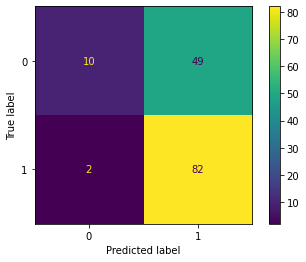

In [ ]:
cm = confusion_matrix(y_SVM_test, y_SVM_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show

## 5.2 - Modelo KNN

In [ ]:
#split dataset
x= df1[['Cargo_Numerico', 'Idade']]
y= df1['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.4, 
                                                    random_state = 0)

print(x_train.shape , x_test.shape, y_test.shape, y_train.shape)  

(285, 2) (190, 2) (190,) (285,)


In [ ]:
#feature scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
#para definir o k
import math
math.sqrt(len(y_test))

13.784048752090222

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
neigh.fit(x_train, y_train.squeeze())

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [ ]:
print('Acuracia (treino): ', neigh.score( x_train, y_train ))
print('Acuracia (teste): ', neigh.score( x_test, y_test ))

Acuracia (treino):  0.6666666666666666
Acuracia (teste):  0.5947368421052631


In [ ]:
y_pred = neigh.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
#avaliando o modelo
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[40 33]
 [44 73]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



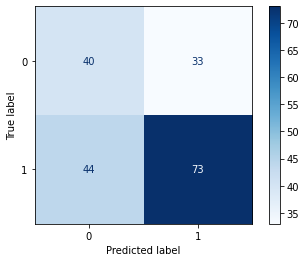

In [ ]:
plot_confusion_matrix(neigh, x_test, y_test, cmap= "Blues")

In [ ]:
print(f1_score(y_test, y_pred))

0.6547085201793722


In [ ]:
print(accuracy_score(y_test, y_pred))

0.5947368421052631


In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_numerico', 'Cidade_numerico',
       'Status', 'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho',
       'Idade', 'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'ECivil_Numerico', 'estadoSP'],
      dtype='object')

## 5.3 - Modelo Árvore de decisão

###5.3.1 criando a árvore de decisão

In [ ]:
df1.columns

Index(['Matricula', 'Nome Completo', 'Dt Admissao', 'Dt Saida', 'Tipo Saida',
       'Cargo', 'Salario Mês', 'Dt Nascimento', 'Genero', 'Etnia',
       'Estado Civil', 'Escolaridade ', 'Estado', 'Cidade', 'Area',
       'Genero_Numerico', 'Tipo_Saida_Numerico', 'Estado_Numerico',
       'Regiao_Numerico', 'Cargo_Numerico', 'Area_numerico', 'Cidade_numerico',
       'Status', 'Media_Salarial', 'Salario_Comparado', 'Tempo_de_Trabalho',
       'Idade', 'Faixa_Etaria', 'Estagnação', 'Reconhecimento_Numerico',
       'Reconhecimento_Medio', 'ECivil_Numerico', 'estadoSP'],
      dtype='object')

PREPARAÇÃO DO DATAFRAME

In [ ]:
x = df1[['Idade', 'Estado_Numerico', 'Regiao_Numerico', 'Salario_Comparado', 'Estagnação', 'Salario Mês','Cargo_Numerico', 'Reconhecimento_Medio','ECivil_Numerico', 'Tempo_de_Trabalho']]

y = df1['Status']

In [ ]:
#PADRONIZAÇÃO
#feature scaling
#sc_x = StandardScaler()
#x = sc_x.fit_transform(x)

In [ ]:
#NORMALIZACAO
# from sklearn.preprocessing import MinMaxScaler

# scaler_minMax = MinMaxScaler()
# x = scaler_minMax.fit_transform(x)

In [ ]:
# #UNDERSAMPLING - não vamos usar

# # Random Undersampler <-
# rus = RandomUnderSampler(random_state = 32)
# X_rus_res, y_rus_res = rus.fit_resample(x, y)

# # NearMiss
# nm = NearMiss(version=1)
# X_nm_res, y_nm_res = nm.fit_resample(x, y)

# # OneSidedSelection (Algoritmo tipo KNN)
# oss = OneSidedSelection(random_state = 32)
# X_oss_res, y_oss_res = oss.fit_resample(x, y)

In [ ]:
#OVERSAMPLING

# Random Oversampler
# ros = RandomOverSampler(random_state = 32)
# X_ros_res, y_ros_res = ros.fit_resample(x, y)

#SMOTE -> melhor
smote = SMOTE(random_state = 32)
x_smote_res, y_smote_res = smote.fit_resample(x, y)

In [ ]:
(y_smote_res).value_counts()

0    284
1    284
Name: Status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(x_smote_res, y_smote_res, test_size=0.3, random_state=32)

arv = DecisionTreeClassifier(random_state=32, max_depth=4, criterion= 'gini', min_samples_leaf= 7)
#splitter='best', min_samples_split= 16, 
arv.fit(x_train_a, y_train_a)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, random_state=32)

In [ ]:
(y_train_a).value_counts()
(y_test_a).value_counts()

1    89
0    82
Name: Status, dtype: int64

In [ ]:
p = arv.predict(x_test_a)
p_1 = arv.predict(x_train_a)

### 5.3.2 avaliando as previsões

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



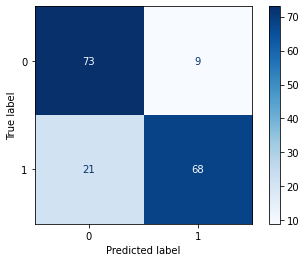

In [ ]:
plot_confusion_matrix(arv, x_test_a, y_test_a, cmap='Blues', values_format='.0f')

Acurácia de teste

In [ ]:
score_te = accuracy_score(p, y_test_a)
score_te

0.8245614035087719

Acurácia de treino

In [ ]:
score_tr = accuracy_score(p_1, y_train_a)
score_tr

0.8035264483627204

In [ ]:
print('Acurácia (treino): ', arv.score( x_train_a, y_train_a ))
print('Acurácia (teste): ', arv.score( x_test_a, y_test_a ))

Acurácia (treino):  0.8035264483627204
Acurácia (teste):  0.8245614035087719


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



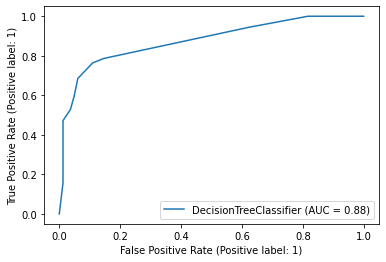

In [ ]:
plot_roc_curve(arv ,x_test_a, y_test_a)

### 5.3.3 visualizando a arvore criada

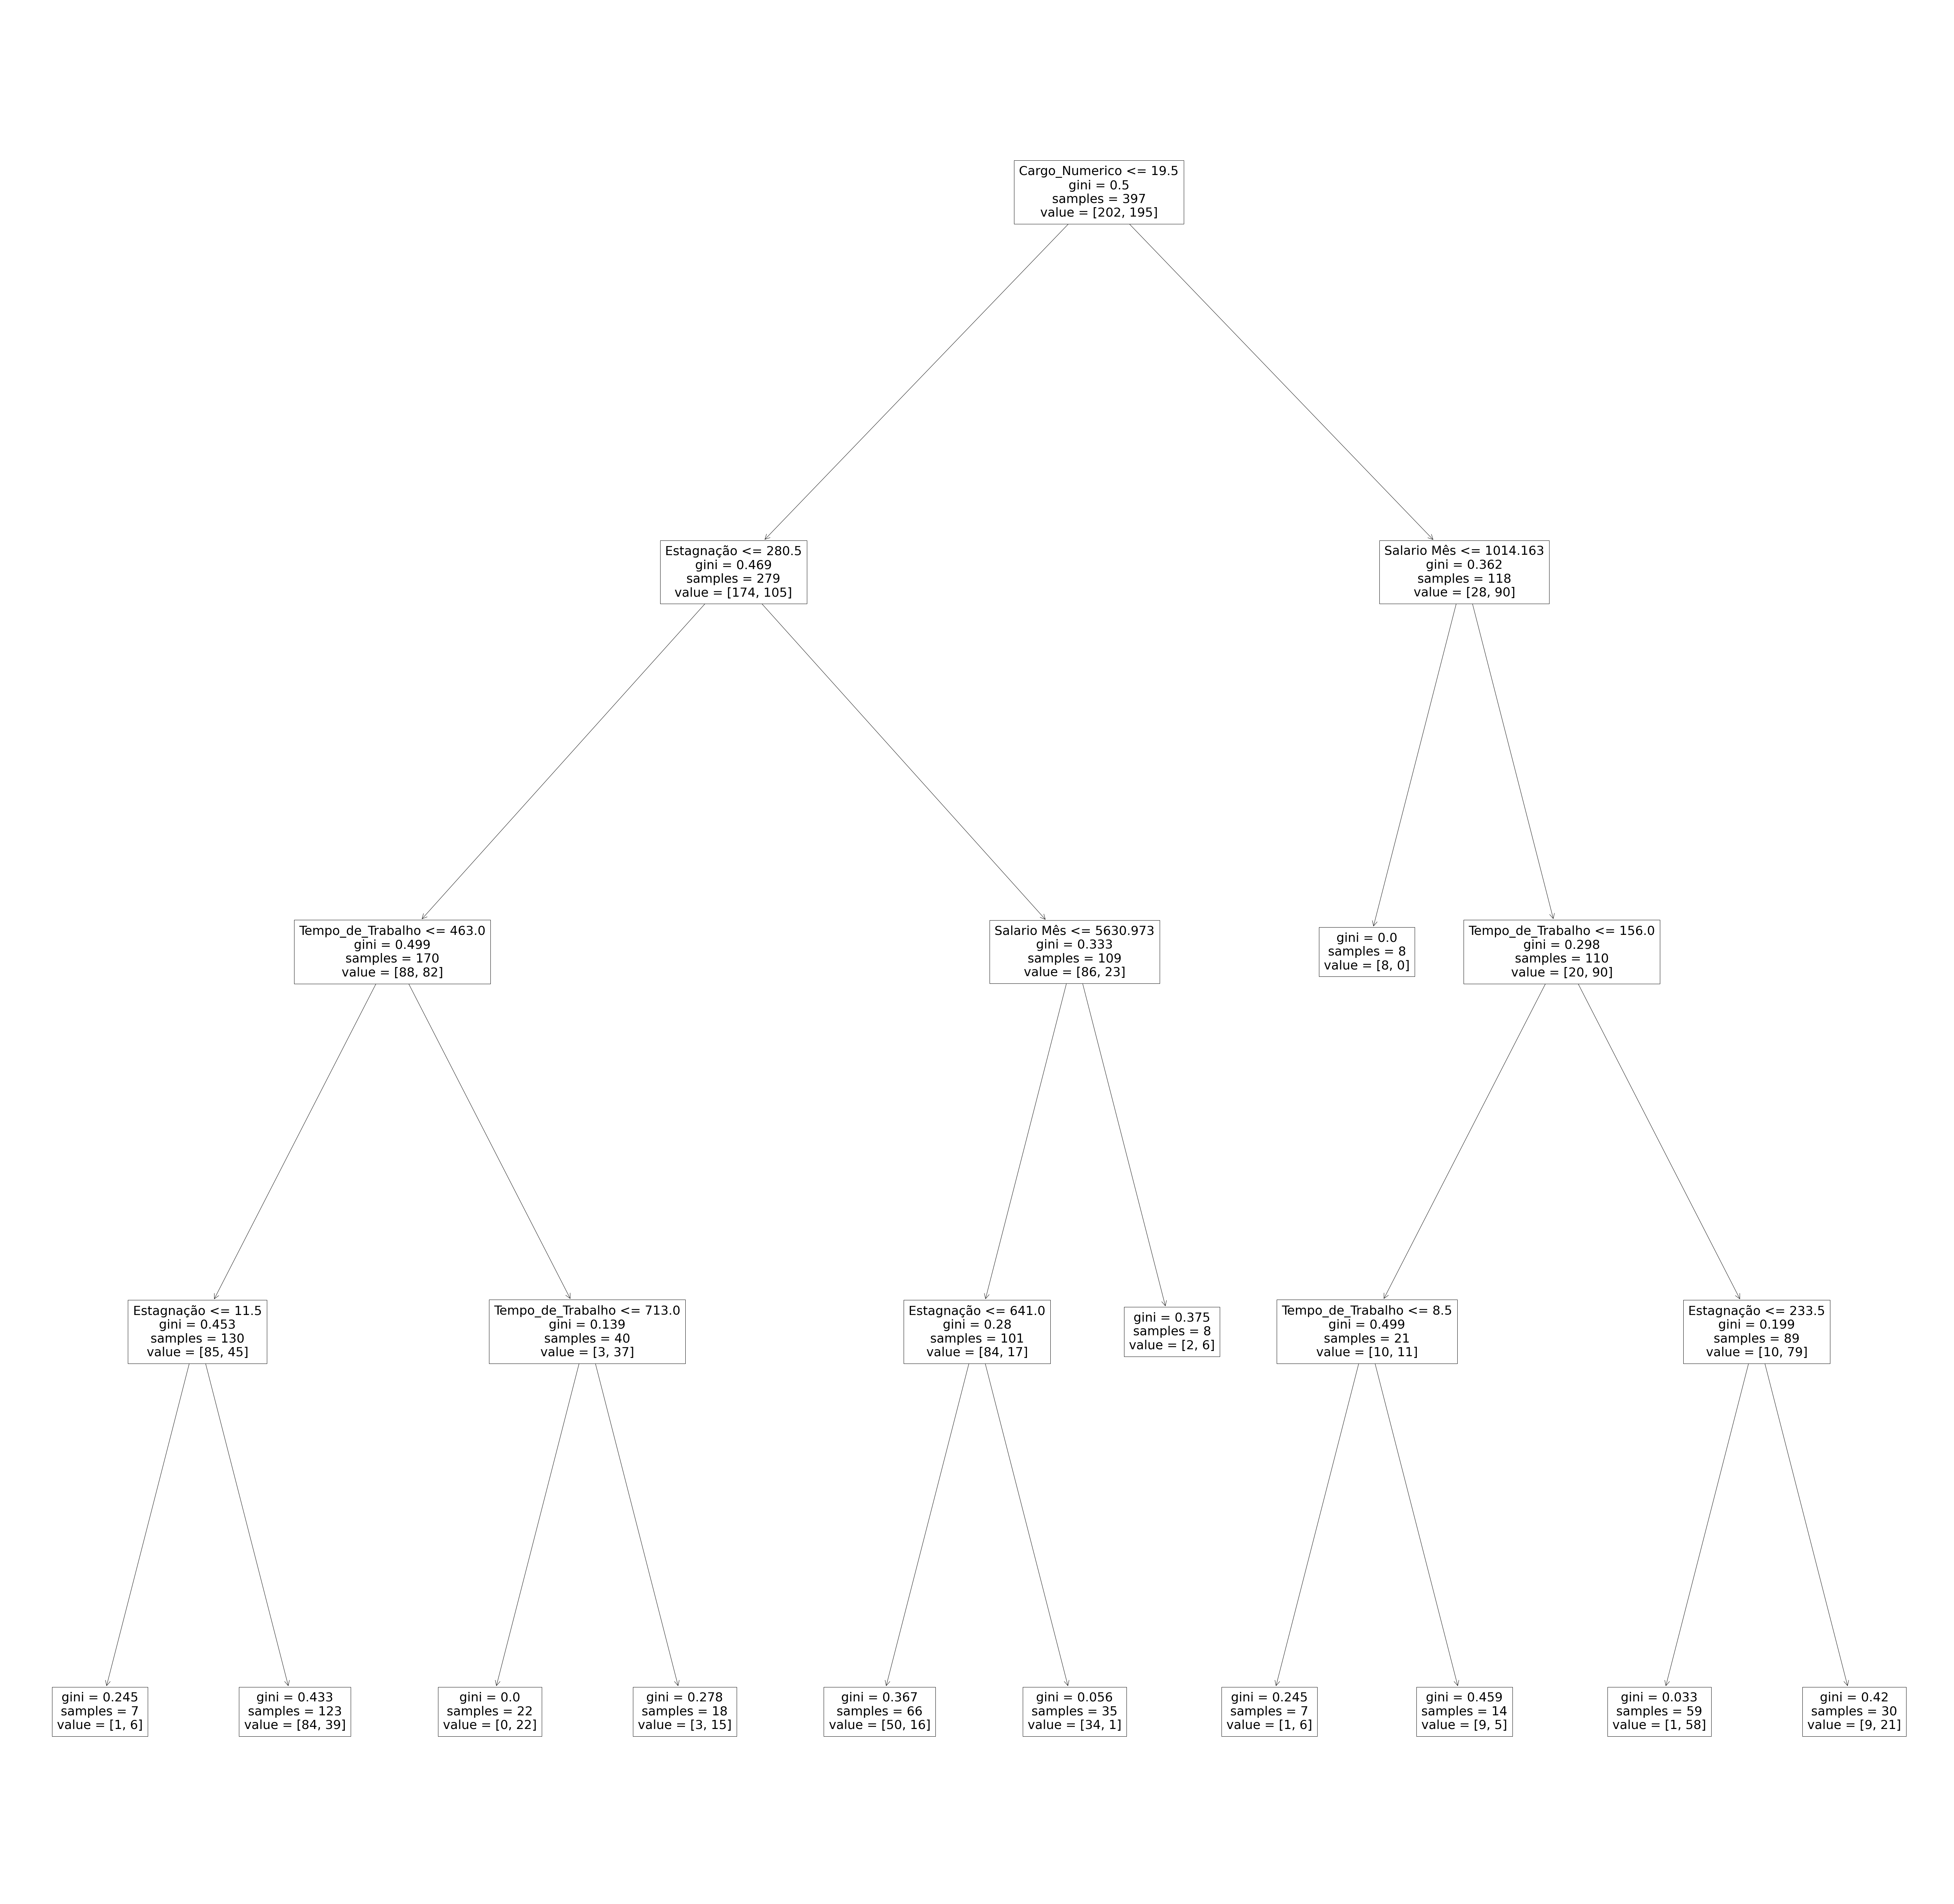

In [ ]:
 fig, ax = plt.subplots(figsize=(100, 100))
 _ = plot_tree(arv, feature_names = x.columns)

### 5.3.4 Random search

In [ ]:
#parametros: criterion, splitter, max_depth, min_samples_split, min_samples_leaf, 

#min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, 'class_weight':{'balanced'}ou tudo 1?, presort: {bool, optional}?, ccp_alpha, max_features(diminuiu)

In [ ]:
# parameters_arv = { 'criterion':['gini', 'entropy', 'log_loss'], 
#                   'splitter':['best', 'random'], 
#                   'max_depth':range(2,10),
#                   'min_samples_split':range(1,20),
#                   'min_samples_leaf':range(1,20)}

In [ ]:
# random_search_arv = RandomizedSearchCV(arv, parameters_arv)
# random_search_arv

In [ ]:
# random_search_arv.fit(x_train_a, y_train_a.squeeze())

In [ ]:
# print(random_search_arv.best_score_)
# print(random_search_arv.best_params_)

In [ ]:
df3

,Divisao,Pilar,Pontuação,Fator,Pontuação.1,Pergunta,Pulou,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Taxa de Confiabilidade
0,Everymind,Satisfação,"8,54",Ambiente de trabalho,"9,05",O seu ambiente de trabalho possibilita que voc...,1.28%,NaN,2.56%,6.41%,17.95%,71.79%,Baixo
1,Everymind,Satisfação,"8,54",Ambiente de trabalho,"9,05",Quão agradável é o seu local de trabalho?,2.41%,NaN,1.2%,NaN,8.43%,87.95%,Baixo
2,Everymind,Satisfação,"8,54",Ambiente de trabalho,"9,05",Seu ambiente de trabalho reflete a cultura org...,2.22%,NaN,1.11%,NaN,34.44%,62.22%,Baixo
3,Everymind,Satisfação,"8,54",Ambiente de trabalho,"9,05",Você está satisfeito com o nível de conforto e...,NaN,2.6%,1.3%,2.6%,22.08%,71.43%,Baixo
4,Everymind,Satisfação,"8,54",Ambiente de trabalho,"9,05",Você tem acesso aos recursos materiais necessá...,2.78%,1.39%,11.11%,NaN,19.44%,65.28%,Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Everymind,Alinhamento,"8,86",Valores,"8,84","Em uma escala de 0 a 10, com que frequência vo...",NaN,NaN,NaN,NaN,20.78%,79.22%,Baixo
1690,Everymind,Alinhamento,"8,86",Valores,"8,84",Os líderes da empresa demonstram que as pessoa...,NaN,NaN,NaN,NaN,NaN,NaN,Muito Baixo
1691,Everymind,Alinhamento,"8,86",Valores,"8,84",Os valores da empresa estão alinhados com os v...,NaN,NaN,1.3%,6.49%,32.47%,59.74%,Baixo
1692,Everymind,Alinhamento,"8,86",Valores,"8,84",Os valores da empresa fazem você se sentir mot...,NaN,NaN,2.53%,2.53%,35.44%,59.49%,Baixo


In [ ]:
df3['Divisao'].value_counts()

Everymind                  154
Core & Industrias I        154
CPG & Retail II            154
AMS&PS                     154
People & Culture           154
Mkt Cloud                  154
Vendas                     154
Commerce                   154
Analytics & Integration    154
CPG & Retail I             154
Core & Industrias II       154
Name: Divisao, dtype: int64

In [ ]:
df1['Area'].value_counts()

Core&IndustriasI     101
Core&IndustriasII    100
CPG&RetailII          38
AMS                   36
CPG&RetailI           35
Commerce              30
Analytics             22
PS                    19
Vendas                18
MktCloud              14
Produtos              13
Integration           11
People                 9
AgenciaDigital         8
CPG&Retail             8
Financeiro             3
Education              3
BestMinds              2
BAC                    1
Core&Industrias        1
Diretoria              1
BPM                    1
Infraestrutura         1
Name: Area, dtype: int64

### 5.3.5 Grid Search

In [ ]:
# Definir o espaço possível dos hiperparametros a serem testados no modelo
parametros = {'criterion':['gini', 'entropy', 'log_loss'], 
                  'splitter':['best', 'random'], 
                  'max_depth':range(2,6),
                  'min_samples_split':range(1,40),
                  'min_samples_leaf':range(1,20)}


grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_train_a, y_train_a.squeeze())

KeyboardInterrupt: ignored

In [ ]:
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
arv_best = grid_search.best_estimator_
arv_best
best_model = DecisionTreeClassifier(random_state = 42,
                                    criterion = 'gini',
                                    max_depth = 12,
                                    min_samples_leaf = 2,
                                    min_samples_split = 23,
                                    splitter = 'best')
print(best_model)

In [ ]:
p = arv_best.predict(x_test_a)
print('Acc treino: ', arv_best.score(x_train_a, y_train_a ))
print('Acc teste: ', arv_best.score(x_test_a, y_test_a.squeeze() ))

In [ ]:
plot_confusion_matrix(arv_best, x_train_a, y_train_a, cmap='Blues', values_format='.0f')

In [ ]:
plot_confusion_matrix(arv_best, y_test_a, p,  cmap='Blues', values_format='.0f')

In [ ]:
# Matrizes de confusão
print('Matriz de Confusão (treino): ')
print(plot_confusion_matrix(y_train_a, p))
print('Matriz de Confusão (teste): ')
print(confusion_matrix(y_test_a, p))

# Outras avaliações do modelo puro
print('Clafssification report: ', classification_report(y_test_a, p))
print('Acurácia (treino): ', arv_best.score(x_train_a, y_train_a))
print('Acurácia (teste): ', arv_best.score(x_test_a, y_test_a))

Matriz de Confusão (treino): 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



TypeError: ignored

###5.3.6 - Testes variando o random_state 

Afim de avaliar a estabilidade do nosso modelo hiperparametrizado, precisamos variar o random state do modelo, que basicamente estabelece um ponto de início aleatório para começar a modelagem. Se a variação do random state for suficiente para modificar muito a acurácia do modelo, significa que ele é pouco estável e precisa ter as features ou hiperparâmetros modificados.

In [ ]:
from sklearn.model_selection import train_test_split
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(x_smote_res, y_smote_res, test_size=0.3, random_state=32)

todos_acc_test_train = []
maior_acc = 0
menor_acc = 100
test_acc_diferentes_array = [-1]
random_state_array = []

for i in range(0, 500):
  arv = DecisionTreeClassifier(random_state = i,
                               max_depth = 4)
  
  arv.fit(x_train_a, y_train_a)

  treino_e_teste = [arv.score( x_train_a, y_train_a), arv.score( x_test_a, y_test_a )]
  if maior_acc < arv.score(x_test_a, y_test_a):
    maior_acc = arv.score(x_test_a, y_test_a)
  if menor_acc > arv.score(x_test_a, y_test_a):
    menor_acc = arv.score(x_test_a, y_test_a)
  if arv.score(x_test_a, y_test_a) not in test_acc_diferentes_array:
    test_acc_diferentes_array.append(arv.score(x_test_a, y_test_a))
    random_state_array.append(i)
  if treino_e_teste not in todos_acc_test_train:
    todos_acc_test_train.append([treino_e_teste])

print('Todas as acurácias em formato [[acc_treino, acc_teste]]: ', todos_acc_test_train)
print('Menor acurácia: ', menor_acc)
print('Maior acurácia: ', maior_acc)
print('Diferentes acurácias para o teste: ', test_acc_diferentes_array)
print('Random_states para cada acurácia acima: ', random_state_array)

Todas as acurácias em formato [[acc_treino, acc_teste]]:  [[[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8245614035087719]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.8304093567251462]], [[0.818639798488665, 0.830409356725146

Tendo em vista esses resultados, pode-se perceber que a acurácia do modelo altera menos de 5% para todos os random_states testados de 0 a 500.

## 5.4 - Modelo de Naive Bayes


In [ ]:
#Divisão de dados para treino '30%'
x = df1[['Idade', 'Cargo_Numerico', 'Regiao_Numerico','estadoSP', 'Salario_Comparado']]
y = df1['Status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 0)
print(y)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

In [ ]:
y_true = y_test

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
plot_confusion_matrix(model, x_test, y_test, cmap= "Blues")

## 5.5 - Modelo de Regressão Logística

In [ ]:
# Dividindo x e y
x = df1[['Faixa_Etaria', 'Cargo_Numerico', 'Regiao_Numerico', 'Estado_Numerico', 'Salario Mês']]
# PS: NUNCA ESQUEÇA DE TIRAR A RESPOSTA DO CONJUNTO DE CARACTERÍSTICAS!!!
y = df1['Status']
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
# Treinando o modelo
model = LogisticRegression().fit(x_train, y_train)
# Fazendo as predições
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_test.value_counts()

In [ ]:
confusion_matrix(y_test, y_pred)


In [ ]:
_ = plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues', values_format='.0f')

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
matriz_corr = df1.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

In [ ]:
target_corr = matriz_corr.data.Status
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

## 5.6 - Redes Neurais

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from numpy import exp, array, random, dot

from sklearn.model_selection import train_test_split

In [ ]:
teste = ['Idade', 'Cargo_Numerico', 'estadoSP', 'Salario_Comparado', 'Reconhecimento_Medio', 'Estagnação']
variáveis = df1[teste]
respostas = df1['Status']

# Undersampling
x_smote, y_smote = SMOTE(random_state = 32).fit_resample(variáveis, respostas)

# divisão
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 32)

modelo = MLPClassifier(random_state = 1, max_iter = 300)
modelo.fit(x_train, y_train)

pred_train = modelo.predict(x_train)
pred_test = modelo.predict(x_test)

print(teste)

# Matrizes de confusão
print('Matriz de Confusão (treino): ')
print(confusion_matrix(y_train, pred_train))
print('Matriz de Confusão (teste): ')
print(confusion_matrix(y_test, pred_test))

# Outras avaliações do modelo puro
print('Clafssification report: ', classification_report(y_test, pred_test))
print('Acurácia (treino): ', modelo.score(x_train, y_train))
print('Acurácia (teste): ', modelo.score(x_test, y_test))

# Com os hiperparâmetros agora
print('Com os hiperparâmetros')

params = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.45, 0.5, 0.55],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'shuffle': [True, False],
    'early_stopping': [True, False],
    'hidden_layer_sizes': range(20, 120)
}


In [ ]:
random_search_neural = RandomizedSearchCV(modelo, params)
random_search_neural.fit(x_train, y_train)

In [ ]:
print(random_search_neural.best_score_)
print(random_search_neural.best_params_)

pred_train_ = random_search_neural.predict(x_train)
pred_test_ = random_search_neural.predict(x_test)

novo_modelo = MLPClassifier(random_state = 1, 
                            max_iter = 300, 
                            solver = 'lbfgs', 
                            learning_rate = 'adaptative', 
                            hidden_layer_sizes = 102, 
                            early_stopping = True, 
                            alpha = 0.5, 
                            activation = 'tanh')

print('Matriz de Confusão (treino): ')
print(confusion_matrix(y_train, pred_train_))
print('Matriz de Confusão (teste): ')
print(confusion_matrix(y_test, pred_test_))

# Outras avaliações do modelo puro
print('Clafssification report: ', classification_report(y_test, pred_test_))
print('Acurácia (treino): ', modelo.score(x_train, y_train))
print('Acurácia (teste): ', modelo.score(x_test, y_test))

In [ ]:
for teste in testes:
  variáveis = df1[teste]
  respostas = df1['Status']

  # Undersampling
  x_smote, y_smote = SMOTE(random_state = 32).fit_resample(variáveis, respostas)

  # divisão
  x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 32)

  modelo = MLPClassifier(random_state = 1, max_iter = 300)
  modelo.fit(x_train, y_train)

  pred_train = modelo.predict(x_train)
  pred_test = modelo.predict(x_test)

  print(teste)
  
  # Matrizes de confusão
  print('Matriz de Confusão (treino): ')
  print(confusion_matrix(y_train, pred_train))
  print('Matriz de Confusão (teste): ')
  print(confusion_matrix(y_test, pred_test))

  # Outras avaliações do modelo puro
  print('Clafssification report: ', classification_report(y_test, pred_test))
  print('Acurácia (treino): ', modelo.score(x_train, y_train))
  print('Acurácia (teste): ', modelo.score(x_test, y_test))

## 5.7 - PyCaret

In [ ]:
import pycaret

In [ ]:
# setup the dataset
grid = s

# 6.0 - Testes

In [ ]:
# from dataprep.eda import create_report

In [ ]:
# create_report(df1).show()

In [ ]:
df1.columns


#